In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2921 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1407 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1076 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9763


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9752
Test accuracy: 0.9751999974250793


In [9]:
# Function to display images and predictions
def display_images(images, labels, predictions=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}')
        if predictions is not None:
            plt.xlabel(f'Predicted: {predictions[i]}', color='blue' if predictions[i] == labels[i] else 'red')
        plt.xticks([])
        plt.yticks([])
    plt.show()

1/1 [==============================] - 0s 477ms/step


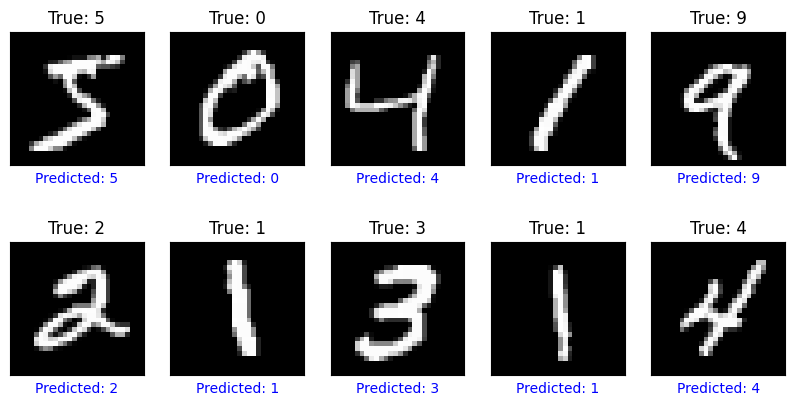

1/1 [==============================] - 0s 32ms/step


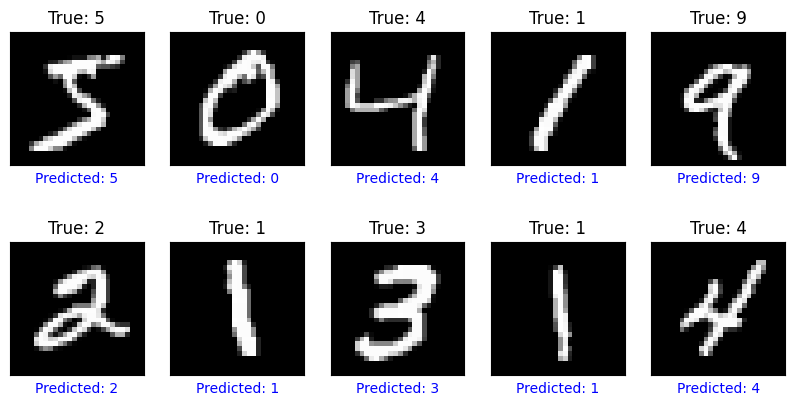

1/1 [==============================] - 0s 33ms/step


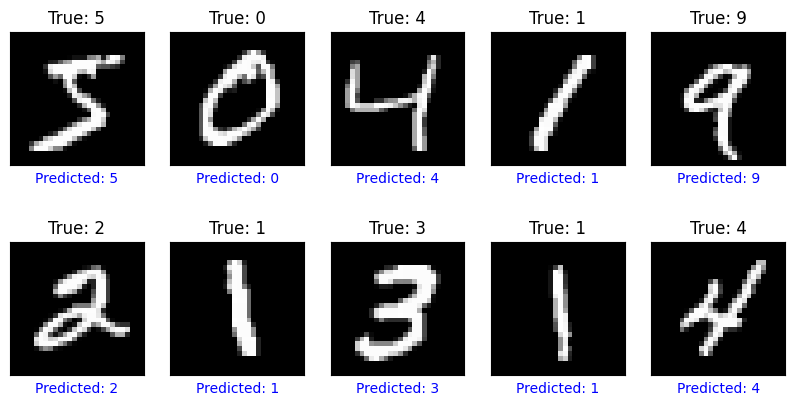

1/1 [==============================] - 0s 23ms/step


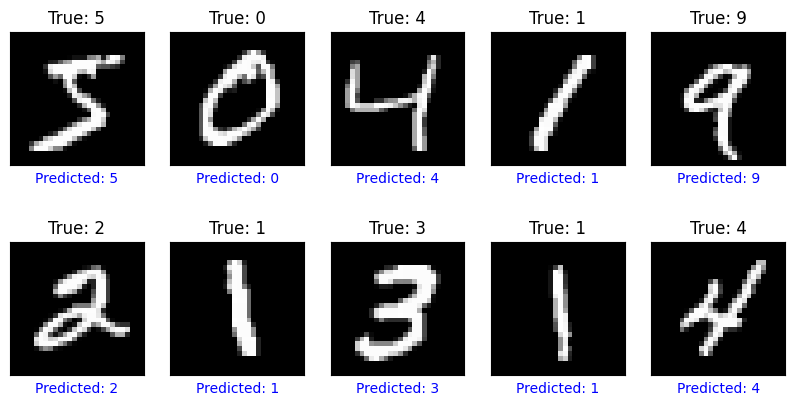

1/1 [==============================] - 0s 20ms/step


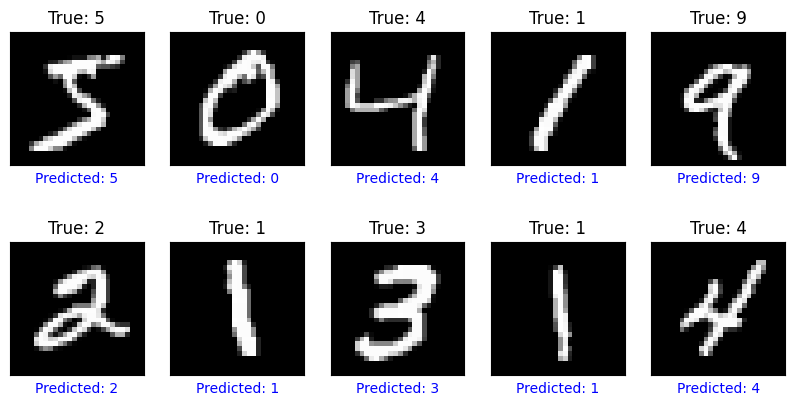

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9844


In [10]:
# Train the model with display of images
for epoch in range(5):
    # Display a few training images and their predictions before each epoch
    predictions = model.predict(train_images[:10])
    predictions = np.argmax(predictions, axis=1)
    display_images(train_images[:10], train_labels[:10], predictions)

    # Train the model for one epoch
    model.fit(train_images, train_labels, epochs=1)

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0712 - accuracy: 0.9795
Test accuracy: 0.9794999957084656


1/1 [==============================] - 0s 30ms/step


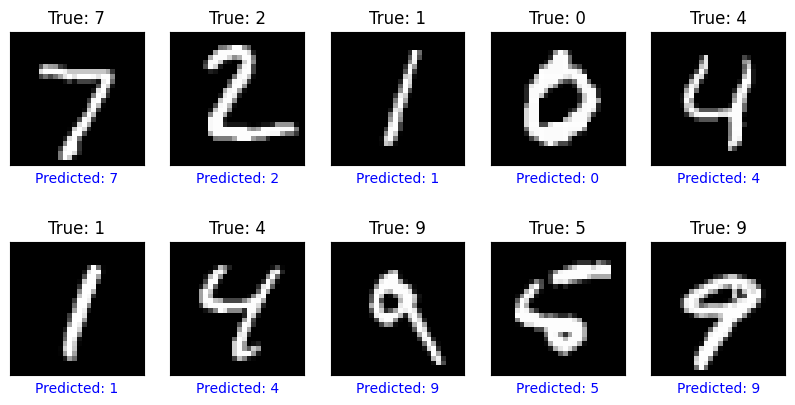

In [12]:
# Display a few test images and their predictions
test_predictions = model.predict(test_images[:10])
test_predictions = np.argmax(test_predictions, axis=1)
display_images(test_images[:10], test_labels[:10], test_predictions)